<p>
  Data Science Bootcamp <br>
  Capstone - Sprint 1<br>
  Xavier Toledo<br>
</p>

# Water access analysis

Water has become a scarce resource in many communities across Canada. For my capstone project, I will analyze available data and leverage machine learning to predict the effects of different stressors. My goal is to help: 1) Corporations optimize their consumption, 2) Non-profit organizations allocate resources to mitigate human impact, and 3) Federal and Provincial government entities plan infrastructure projects more efficiently.



# Table of Contents
* [Part 1 - Data Cleaning](#p1)
    * [Section 1.1](#s1_1)
    * [Section 1.2](#s1_2)
* [Part 2 - Exploratory Data Analysis](#p2)
    * [Section 2.1](#s2_1)
    * [Section 2.2](#s2_2)
* [Part 3 - Statistical Analysis](#p3)
    * [Section 3.1](#s3_1)
    * [Section 3.2](#s3_2)
* [Part 4 - Machine Learning](#p4)
    * [Section 4.1](#s4_1)
    * [Section 4.2](#s4_2)
* [Part 5 - TBD](#p5)
    * [Section 5.1](#s5_1)
    * [Section 5.2](#s5_2)
* [Part 6 - TBD](#p6)
    * [Section 6.1](#s6_1)
    * [Section 6.2](#s6_2)
* [Part 7 - TBD](#p7)
    * [Section 7.1](#s7_1)
    * [Section 7.2](#s7_2)


# Part 1 - Data Loading and Cleaning <a class="anchor" id="p1"></a>

### Section 1.1 - <a id="s1_1"></a>Importing libraries and data

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import chi2
import numpy as np

In [205]:
# Importing data

df = pd.read_csv('data/Water-Qual-Eau-N-Saskatchewan-2000-present.csv', index_col=0)

C:\Users\xavie.XAVIERUXCHAMP\AppData\Local\Temp\ipykernel_20084\2099113879.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Water-Qual-Eau-N-Saskatchewan-2000-present.csv', index_col=0)


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97186 entries, AL05DA0001 to SA05FE0001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE_TIME_HEURE        97186 non-null  object 
 1   FLAG_MARQUEUR          12486 non-null  object 
 2   VALUE_VALEUR           97182 non-null  object 
 3   SDL_LDE                78012 non-null  float64
 4   MDL_LDM                0 non-null      float64
 5   VMV_CODE               97186 non-null  int64  
 6   UNIT_UNITÉ             97186 non-null  object 
 7   VARIABLE               97186 non-null  object 
 8   VARIABLE_FR            97183 non-null  object 
 9   STATUS_STATUT          97186 non-null  object 
 10  SAMPLE_ID_ÉCHANTILLON  97186 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.9+ MB


<font color='blue'> In order to work with this we will need to change data types for a few of the variables.</font>

In [207]:
df.head(25)

,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,VARIABLE_FR,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
SITE_NO,,,,,,,,,,,
AL05DA0001,2000-01-11 10:35,NaN,115.,0.1000,NaN,10111,MG/L,ALKALINITY TOTAL CACO3,ALCALINITÉ TOTALE CACO3,P,1999PN090114
AL05DA0001,2000-01-11 10:35,<,0.020,0.0200,NaN,100195,MG/L,ALUMINUM DISSOLVED,ALUMINIUM DISSOUS,P,1999PN090114
AL05DA0001,2000-01-11 10:35,<,0.005,0.0050,NaN,7540,MG/L,AMMONIA DISSOLVED,AZOTE AMMONIACAL DISSOUS,P,1999PN090114
AL05DA0001,2000-01-11 10:35,NaN,0,NaN,NaN,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),AZOTE AMMONIACAL NON IONISÉ (CALC.),P,1999PN090114
AL05DA0001,2000-01-11 10:35,<,0.0001,0.0001,NaN,100253,MG/L,ARSENIC DISSOLVED,ARSENIC DISSOUS,P,1999PN090114
AL05DA0001,2000-01-11 10:35,NaN,0.034,0.0010,NaN,100196,MG/L,BARIUM DISSOLVED,BARYUM DISSOUS,P,1999PN090114
AL05DA0001,2000-01-11 10:35,<,0.50,0.5000,NaN,100197,µG/L,BERYLLIUM DISSOLVED,BÉRYLLIUM DISSOUS,P,1999PN090114
AL05DA0001,2000-01-11 10:35,NaN,140.185,NaN,NaN,6201,MG/L,BICARBONATE (CALCD.),BICARBONATE (CALC.),P,1999PN090114
AL05DA0001,2000-01-11 10:35,NaN,0.003,0.0020,NaN,100211,MG/L,BORON DISSOLVED,BORE DISSOUS,P,1999PN090114


In [208]:
# Displaying the shape of the DataFrame
df.shape

(97186, 11)

In [209]:
# Checking for Nulls
null_values = df.isnull()

print("Null Values in DataFrame:")
print(null_values)

Null Values in DataFrame:
            DATE_TIME_HEURE  FLAG_MARQUEUR  VALUE_VALEUR  SDL_LDE  MDL_LDM  \
SITE_NO                                                                      
AL05DA0001            False           True         False    False     True   
AL05DA0001            False          False         False    False     True   
AL05DA0001            False          False         False    False     True   
AL05DA0001            False           True         False     True     True   
AL05DA0001            False          False         False    False     True   
...                     ...            ...           ...      ...      ...   
SA05FE0001            False           True         False    False     True   
SA05FE0001            False           True         False    False     True   
SA05FE0001            False           True         False    False     True   
SA05FE0001            False           True         False    False     True   
SA05FE0001            False           

<font color='blue'> Although there are some Null values, they are isolated to the Flag variable which I will not use for my initial Exploratory Data Analysis. Hence, no action taken at this time. </font>

In [210]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are :
             DATE_TIME_HEURE FLAG_MARQUEUR VALUE_VALEUR  SDL_LDE  MDL_LDM  \
SITE_NO                                                                     
AL05DA0001  2010-11-24 13:30           NaN          3.0     10.0      NaN   
AL05DA0001  2013-06-25 14:00           NaN            0      NaN      NaN   
AL05DA0001  2013-06-25 14:00           NaN        2.397      NaN      NaN   
AL05DA0001  2013-06-25 14:00           NaN        0.142      NaN      NaN   
AL05DA0001  2013-06-25 14:00           NaN        0.029      NaN      NaN   
AL05DA0001  2013-08-28 11:00           NaN            0      NaN      NaN   
AL05DA0001  2013-08-28 11:00           NaN        1.445      NaN      NaN   
AL05DA0001  2013-08-28 11:00           NaN        0.103      NaN      NaN   
AL05DA0001  2013-08-28 11:00           NaN         0.03      NaN      NaN   
AL05DA0001  2013-09-11 11:15           NaN        1.067      NaN      NaN   
AL05DA0001

In [211]:
# Checking for duplicate columns

<font color='blue'> Results show multiple Variables and Sample IDs for each Site, as expected.</font>

In [212]:
#df['PROV_TERR'].value_counts()

In [287]:
df['VARIABLE'].value_counts()

VARIABLE
NITROGEN TOTAL DISSOLVED           958
TURBIDITY                          957
CARBON DISSOLVED ORGANIC           957
PHOSPHORUS PARTICULATE (CALCD.)    956
PHOSPHORUS TOTAL                   954
                                  ... 
ENDOSULFAN II                        3
IRON EXTRACTABLE                     1
1,3,5-TRIBROMOBENZENE                1
ALKALINITY GRAN CACO3                1
1,3-DIBROMOBENZENE                   1
Name: count, Length: 281, dtype: int64

In [290]:
# Convert 'Variable' column to string
df['VARIABLE'] = df['VARIABLE'].astype(str)

In [292]:
# Get top 25 Variables for illustration purposes

value_counts = df['VARIABLE'].value_counts()  # Count occurrences of each unique value

top_25_counts = value_counts.nlargest(25)


In [214]:
#df.groupby('PROV_TERR').sum(numeric_only=True) 

In [215]:
df.groupby('VARIABLE').sum(numeric_only=True) 

,SDL_LDE,MDL_LDM,VMV_CODE
VARIABLE,,,
"1,2,4,5-TETRABROMOBENZENE (1,2,4,5-TBB)",57.0000,0.0,5943361
"1,3,5-TRIBROMOBENZENE",1.0000,0.0,8070
"1,3-DIBROMOBENZENE",1.0000,0.0,8069
13C10-GAMMA-CHLORDANE,3.0000,0.0,184173
"2,3,6-TBA",6.5560,0.0,49522
...,...,...,...
YTTRIUM TOTAL,0.2940,0.0,31733772
ZINC DISSOLVED,108.4600,0.0,91322405
ZINC TOTAL,109.5672,0.0,87143947


In [216]:
# Convert 'Variable' column to string
df['VARIABLE'] = df['VARIABLE'].astype(str)

In [217]:
df.groupby('SAMPLE_ID_ÉCHANTILLON').sum(numeric_only=True) 

,SDL_LDE,MDL_LDM,VMV_CODE
SAMPLE_ID_ÉCHANTILLON,,,
1999PN090114,12.1832,0.0,3126448
1999PN090121,23.2394,0.0,4722126
1999PN090122,22.7674,0.0,4180677
1999PN090124,12.1832,0.0,3126448
1999PN090136,23.2394,0.0,4686124
...,...,...,...
2023PNP10051,24.6742,0.0,9241558
2023PNP10054,24.6742,0.0,9241558
2023PNP10057,24.6742,0.0,9241558


In [218]:
df.sample()

,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,VARIABLE_FR,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
SITE_NO,,,,,,,,,,,
SA05FE0001,2015-04-08 18:15,NaN,0.088,0.005,NaN,107961,µG/L,LEAD DISSOLVED,PLOMB DISSOUS,P,2015PN140003


In [219]:
# Visualizing raw data



In [220]:
# a TRue/False array, marking whether a row appears more than once
df.duplicated()

SITE_NO
AL05DA0001    False
AL05DA0001    False
AL05DA0001    False
AL05DA0001    False
AL05DA0001    False
              ...  
SA05FE0001    False
SA05FE0001    False
SA05FE0001    False
SA05FE0001    False
SA05FE0001    False
Length: 97186, dtype: bool

In [221]:
df.duplicated().sum()

17

In [222]:
# the % of duplicates
df.duplicated().sum()/df.shape[0]*100

0.017492231391352666

In [223]:
df.loc[df.duplicated(), :].sort_values("DATE_TIME_HEURE")

,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,VARIABLE_FR,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
SITE_NO,,,,,,,,,,,
AL05DA0001,2010-11-24 13:30,NaN,3.0,10.0,NaN,10401,MG/L,RESIDUE NONFILTERABLE,RÉSIDUS NON-FILTRABLES,P,2010PN140155
AL05DA0001,2013-06-25 14:00,NaN,0,NaN,NaN,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),AZOTE AMMONIACAL NON IONISÉ (CALC.),P,2013PN140048
AL05DA0001,2013-06-25 14:00,NaN,2.397,NaN,NaN,6002,MG/L,CARBON TOTAL ORGANIC (CALCD.),CARBONE ORGANIQUE TOTAL (CALC.),P,2013PN140048
AL05DA0001,2013-06-25 14:00,NaN,0.142,NaN,NaN,7603,MG/L,NITROGEN TOTAL (CALCD.),AZOTE TOTAL (CALC.),P,2013PN140048
AL05DA0001,2013-06-25 14:00,NaN,0.029,NaN,NaN,15901,MG/L,PHOSPHORUS PARTICULATE (CALCD.),PHOSPHORE PARTICULAIRE (CALC.),P,2013PN140048
AL05DA0001,2013-08-28 11:00,NaN,0.103,NaN,NaN,7603,MG/L,NITROGEN TOTAL (CALCD.),AZOTE TOTAL (CALC.),P,2013PN140070
AL05DA0001,2013-08-28 11:00,NaN,0.03,NaN,NaN,15901,MG/L,PHOSPHORUS PARTICULATE (CALCD.),PHOSPHORE PARTICULAIRE (CALC.),P,2013PN140070
AL05DA0001,2013-08-28 11:00,NaN,0,NaN,NaN,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),AZOTE AMMONIACAL NON IONISÉ (CALC.),P,2013PN140070
AL05DA0001,2013-08-28 11:00,NaN,1.445,NaN,NaN,6002,MG/L,CARBON TOTAL ORGANIC (CALCD.),CARBONE ORGANIQUE TOTAL (CALC.),P,2013PN140070


In [225]:
df["VALUE_VALEUR"].describe()

count    97178.000000
mean        51.126588
std        348.883203
min         -8.713000
25%          0.020000
50%          0.540000
75%          8.400000
max      41700.000000
Name: VALUE_VALEUR, dtype: float64

In [ ]:
# Converting data types

import pandas as pd

# Convert DATE_TIME_HEURE to datetime
df["DATE_TIME_HEURE"] = pd.to_datetime(df["DATE_TIME_HEURE"])

# Convert VALUE_VALEUR to float (assuming it contains numeric values)
df["VALUE_VALEUR"] = pd.to_numeric(df["VALUE_VALEUR"], errors="coerce")

# Convert SAMPLE_ID_ÉCHANTILLON to a string
df["SAMPLE_ID_ÉCHANTILLON"] = pd.to_numeric(df["VALUE_VALEUR"], errors="coerce")

# Convert 'Variable' column to string
df['VARIABLE'] = df['VARIABLE'].astype(str)


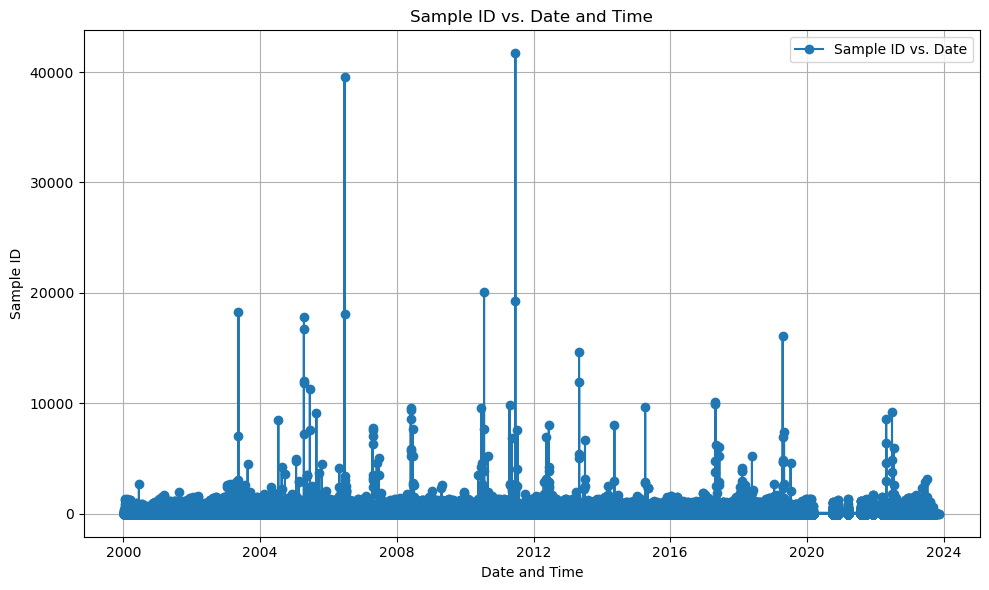

In [309]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['DATE_TIME_HEURE'], df['SAMPLE_ID_ÉCHANTILLON'], marker='o', label='Sample ID vs. Date')
plt.xlabel('Date and Time')
plt.ylabel('Sample ID')
plt.title('Sample ID vs. Date and Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\xavie.XAVIERUXCHAMP\AppData\Local\Temp\ipykernel_20084\2555058863.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


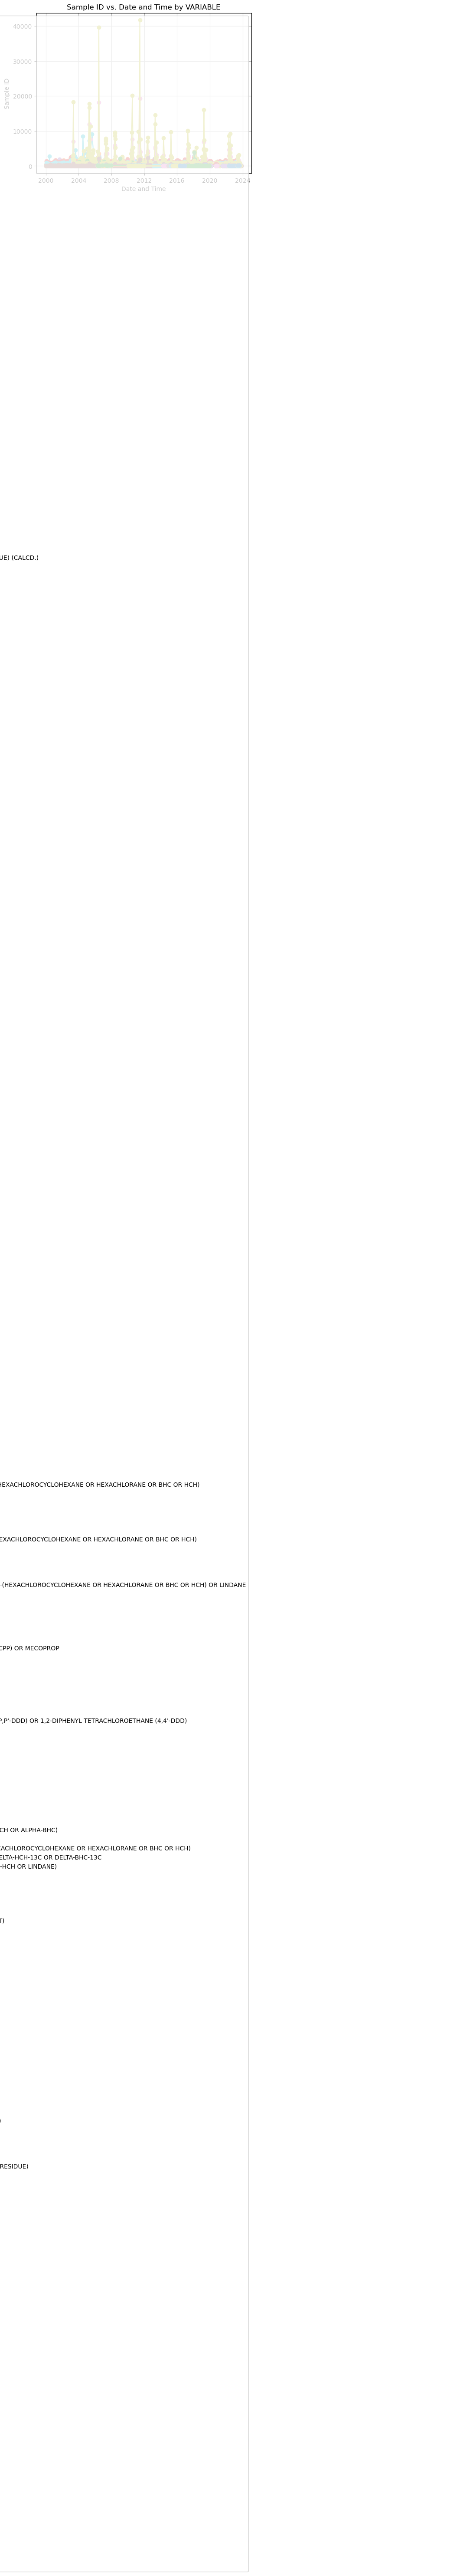

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by VARIABLE and plot the time series for each group
for variable in df['VARIABLE'].unique():
    df_group = df[df['VARIABLE'] == variable]
    plt.plot(df_group['DATE_TIME_HEURE'], df_group['SAMPLE_ID_ÉCHANTILLON'], marker='o', label=variable)

plt.xlabel('Date and Time')
plt.ylabel('Sample ID')
plt.title('Sample ID vs. Date and Time by VARIABLE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<font color='blue'> Looking at plots above, is clear that the dataset is rather large and contains multiple variables. Nevertheless, I am not ready to drop any columns.</font>

In [283]:
# Filter numeric values
numeric_df = df[pd.to_numeric(df["VARIABLE"], errors="coerce").notnull()]

print(numeric_df)


Empty DataFrame
Columns: [DATE_TIME_HEURE, FLAG_MARQUEUR, VALUE_VALEUR, SDL_LDE, MDL_LDM, VMV_CODE, UNIT_UNITÉ, VARIABLE, VARIABLE_FR, STATUS_STATUT, SAMPLE_ID_ÉCHANTILLON]
Index: []


In [ ]:
In [12]: median_column = df["VARIABLE"]

In [13]: type(median_column)
Out[13]: pandas.core.series.Series

In [ ]:
import pandas as pd
import numpy as np

df['VALUE_VALEUR'].mean()


In [ ]:
df = pd.DataFrame(df, index = ['SAMPLE_ID_ÉCHANTILLON'])
df

In [237]:
import pandas as pd

# Grouping by the Date and Value columns and calculating mean and median
result = df.groupby("DATE_TIME_HEURE")["VALUE_VALEUR"].agg(["mean", "median"])

print(result)


                          mean  median
DATE_TIME_HEURE                       
2000-01-11 10:35:00  22.601581  0.4550
2000-01-19 15:45:00  72.208790  0.1800
2000-01-20 09:30:00   8.077927  0.0185
2000-02-09 09:05:00  69.191059  0.1840
2000-02-09 11:20:00   8.356815  0.0240
...                        ...     ...
2023-09-20 13:45:00   0.962980  0.1970
2023-10-03 10:44:00   0.659953  0.0980
2023-10-11 10:00:00   3.942027  0.7740
2023-10-11 15:15:00   1.082013  0.2700
2023-11-15 15:45:00   2.000000  2.0000

[950 rows x 2 columns]


In [282]:
# df.groupby(df.date.dt.year)

# df.groupby(df['DATE_TIME_HEURE'])

### Section 1.2 - <a id="s1_2"></a> Preliminary visualization and trend analysis

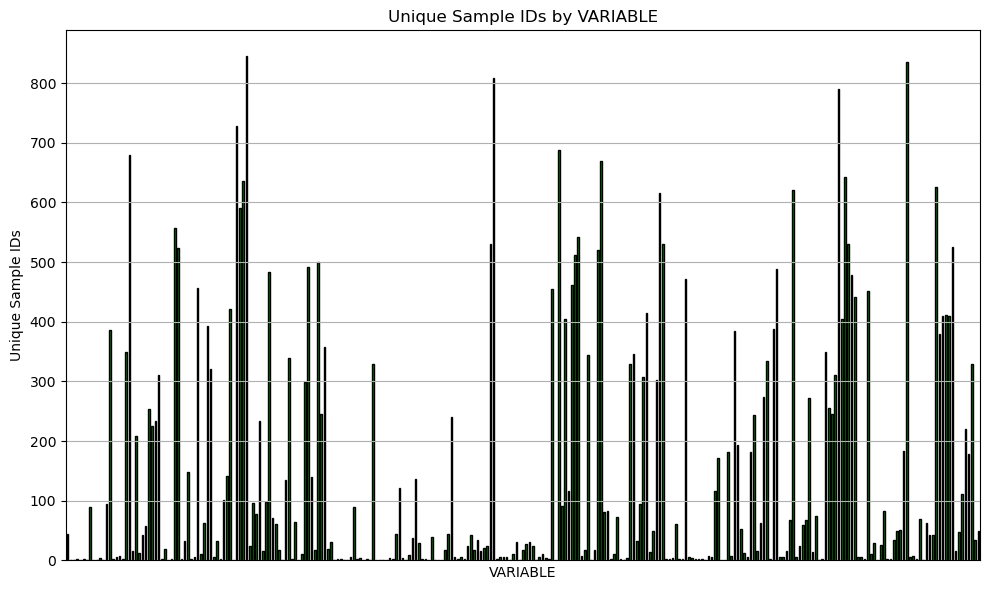

In [284]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DATE_TIME_HEURE' to datetime (if not already)
df['DATE_TIME_HEURE'] = pd.to_datetime(df['DATE_TIME_HEURE'])

# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='green', edgecolor='black')
#grouped_counts.plot(kind='bar', cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
plt.xticks([])  # Hide x-axis ticks
plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45) 
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


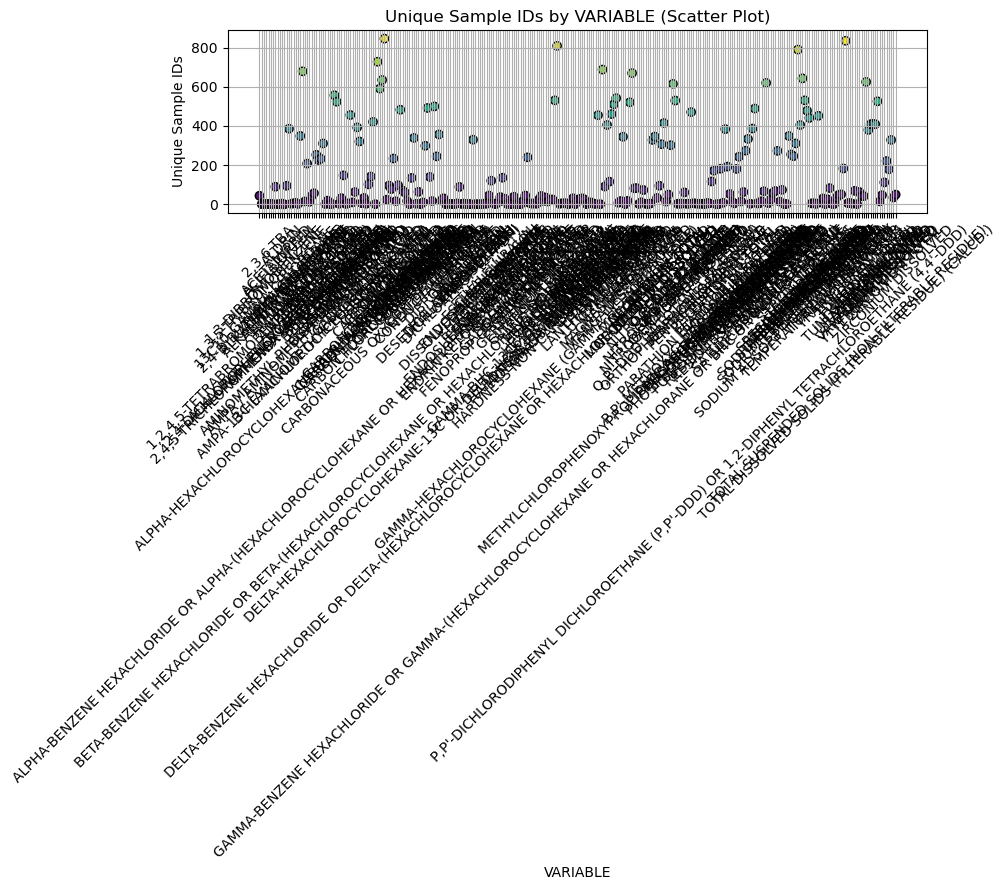

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
#plt.xticks([])  # Hide x-axis ticks
#plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45) 
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()

<font color='blue'> Attempting to visualize trends.</font>

C:\Users\xavie.XAVIERUXCHAMP\AppData\Local\Temp\ipykernel_20084\2264411552.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


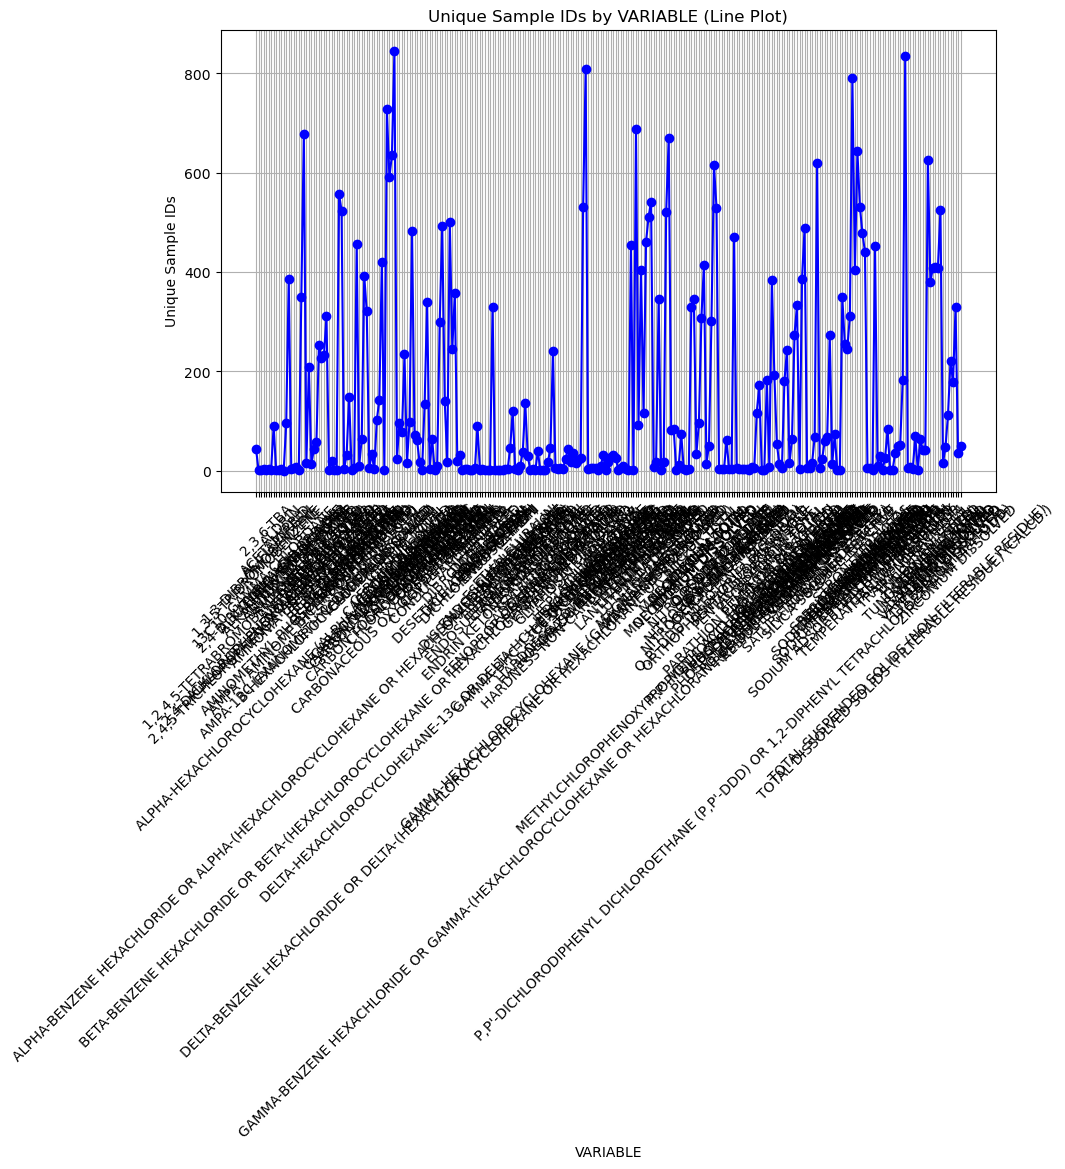

In [286]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'VARIABLE' and 'SAMPLE_ID_ÉCHANTILLON'
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_counts.index, grouped_counts.values, marker='o', color='blue', linestyle='-', label='Unique Sample IDs')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel('VARIABLE')
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Line Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()



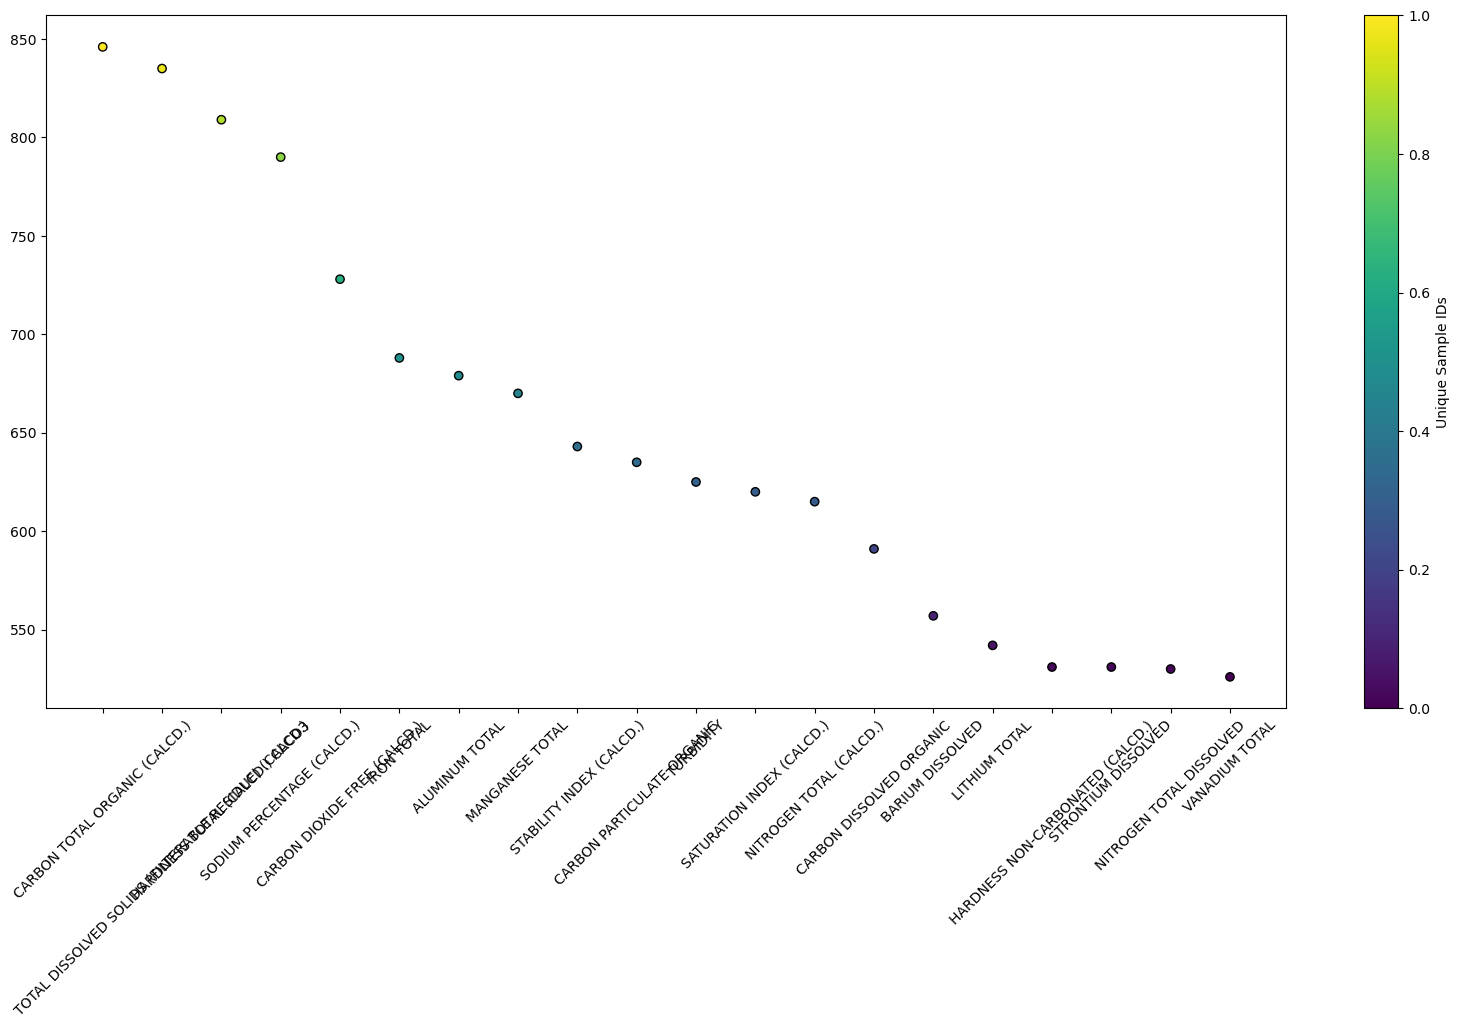

In [303]:
# Filter top 20 variables
top_20_counts = grouped_counts.sort_values(ascending=False).head(20)

# Create colormap based on counts
cmap = plt.cm.viridis
norm = plt.Normalize(top_20_counts.min(), top_20_counts.max())

# Create scatter plot
plt.figure(figsize=(20, 9))
plt.scatter(top_20_counts.index, top_20_counts.values, c=cmap(norm(top_20_counts.values)), edgecolor='black')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)  # Adjust the angle as needed (e.g., 90 for vertical)


plt.colorbar(label='Unique Sample IDs')  # Add colorbar to show count legend
plt.show()


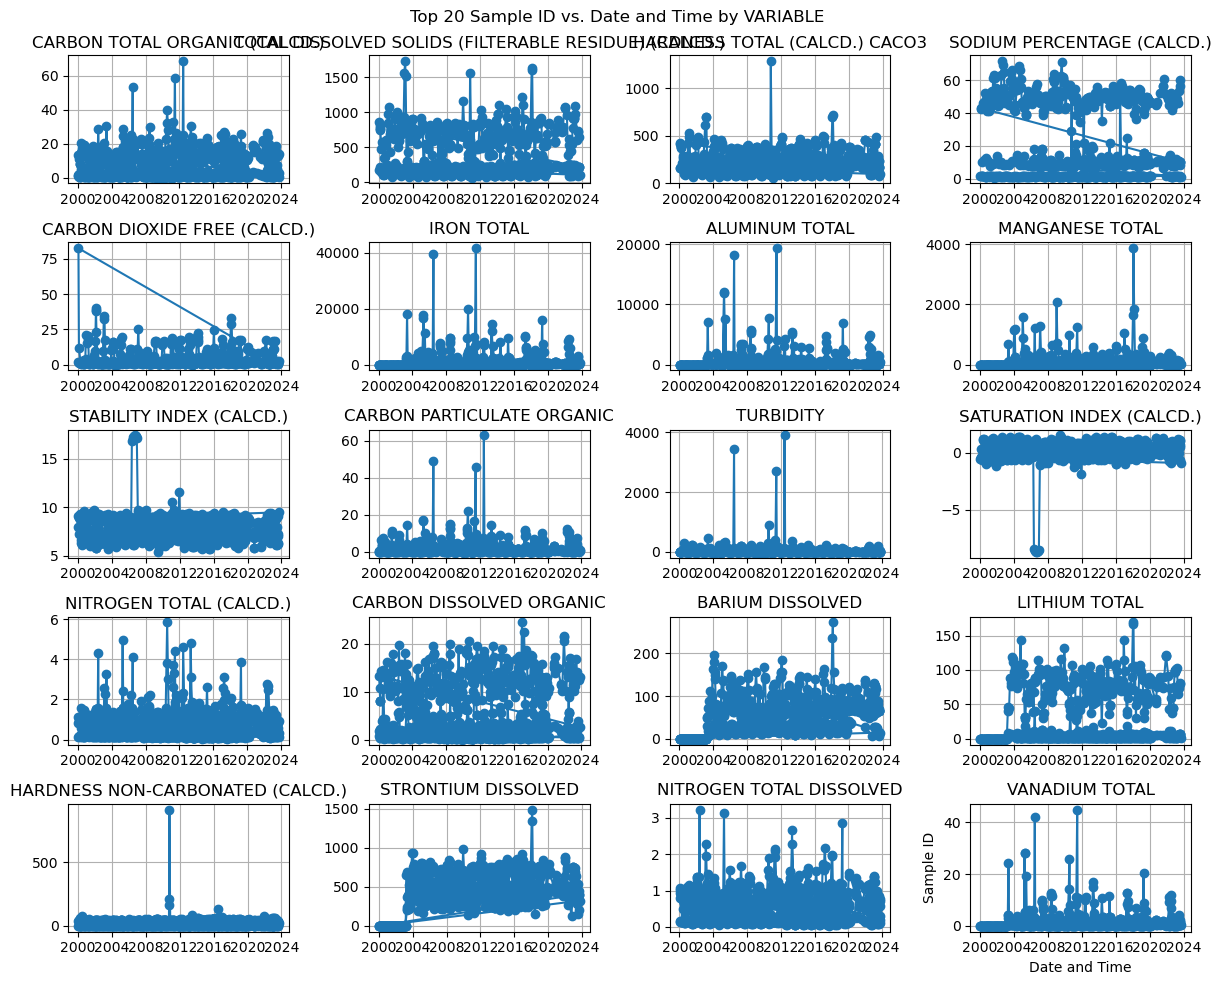

In [308]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 20 variables based on unique sample IDs
top_20_variables = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique().sort_values(ascending=False).index[:20]

# Create a 5x4 subplot grid for the top 20
fig, axes = plt.subplots(5, 4, figsize=(12, 10))  # Adjust figsize if needed

# Iterate over the top 20 variables and plot on respective subplots
for i, variable in enumerate(top_20_variables):
    row, col = i // 4, i % 4  # Calculate row and column indices
    df_group = df[df['VARIABLE'] == variable]

    axes[row, col].plot(df_group['DATE_TIME_HEURE'], df_group['SAMPLE_ID_ÉCHANTILLON'], marker='o', label=variable)
    axes[row, col].set_title(variable)
    axes[row, col].grid(True)

# Adjust layout and labels
fig.suptitle('Top 20 Sample ID vs. Date and Time by VARIABLE')
plt.xlabel('Date and Time')
plt.ylabel('Sample ID')
plt.tight_layout()
plt.show()


<font color='blue'> By isolating the Top 20 Variables is a lot easier to visualize the data.</font>

# Part 2 - Exploratory Data Analysis <a id="p2"></a>

### Section 2.1 - <a id="s2_1"></a> TBD

Null Hypothesis (H0): here is no significant association between WNV occurrence and mosquito species
Alternative Hypothesis (H1): there is a significant association between WNV occurrence and mosquito species

Being categorical data types, we determine that Chi Squared is the suitable hypothesis test

In [ ]:
# Grouping data by species and WNV presence
grouped_data = mp2.groupby(['Species', 'WNV Present']).size().unstack()

# Performing Chi-square test
chi2, pval, _, _ = stats.chi2_contingency(grouped_data)

# Printing the p-value
print("p-value:", pval)

# Interpreting results
if pval < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in WNV occurrence among different mosquito species.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in WNV occurrence among different mosquito species.")


<font color='blue'> Interpretation:</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Defining the range for the x-axis (degrees of freedom = 4)
#x = np.arange(0, 20, 0.001)
x = np.linspace(0, 20, 1000)

# Calculating the Chi-square probability density function (PDF)
pdf_values = chi2.pdf(x, df=4)

# Plotting the Chi-square distribution
plt.plot(x, pdf_values, label='Chi-Square (df=4)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-Square Distribution (df=4)')
plt.legend()

# Shade the area corresponding to p-value at the tail
alpha = 0.05  # significance level (adjust as needed)
critical_value = chi2.ppf(1 - alpha, df=4)  # Find the critical value for the given significance level
x_shade = np.linspace(critical_value, x.max(), 100)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=4), color='red', alpha=0.3, label=f'p-value < {alpha}')

# Showing the plot
plt.show()

<font color='blue'>Interpretation.</font>

### Section 2.2 - <a id="s2_2"></a> Establishing correlations between different columns. Checking to see if those are statistically significant

In [ ]:
# Checking correlation between numeric variables

# mp2.corr(numeric_only = True)

<font color='blue'> Per above, we see that these columns are positively correlated: WNV Present (0.408), Year (0.129), TrapType_OVI (0.109), and TrapType_SENTINEL (0.128). And that these columns are negatively correlated: Lat (-0.094), Lon (-0.095), TrapType_CDC (-0.262), and TrapType_GRAVID (-0.155)</font>

In [ ]:
# import seaborn as sns
# sns.heatmap(mp2.corr(numeric_only = True), cmap='coolwarm')
# plt.show()
# # looking at the color scale, what do you notice?

<font color='blue'> This heatmap illustrates the correlations between Mosquto number and other numeric variables</font>

In [ ]:
# We now perform further analysis to determine if the correlations are statistically significant.
# We will use Pearson correlation tests and we will focus on positively correlated columns.

# import pandas as pd
# from scipy import stats

# # Calculating the correlation coefficients and p-values
# corr1, pval = stats.pearsonr(mp2['Mosquito number'], mp2['WNV Present'])
# corr2, pval = stats.pearsonr(mp2['Mosquito number'], mp2['Year'])
# corr3, pval = stats.pearsonr(mp2['Mosquito number'], mp2['TrapType_OVI'])
# corr4, pval = stats.pearsonr(mp2['Mosquito number'], mp2['TrapType_SENTINEL'])

# # Format p-value manually with 6 decimal places
# formatted_pval = f"{pval:.8f}"

# # Printing the results
# print("-" * 30)
# print(f"Mosquito number vs. WNV Present")
# print(f"    - correlation coefficient: {corr1:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# print("-" * 30)
# print(f"Mosquito number vs. Year")
# print(f"    - correlation coefficient: {corr2:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# print("-" * 30)
# print(f"Mosquito number vs. TrapType_OVI")
# print(f"    - correlation coefficient: {corr3:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# print("-" * 30)
# print(f"Mosquito number vs. TrapType_SENTINEL")
# print(f"    - correlation coefficient: {corr4:.4f}")
# print(f"    - p-value: {formatted_pval}")
# print("-" * 30)

# # Interpretation
# # A correlation coefficient close to 1 indicates a strong positive relationship.
# # A correlation coefficient close to -1 indicates a strong negative relationship.
# # A p-value close to 0 indicates a statistically significant correlation.


<font color='blue'> Results above show p-values of 0, indicating a statistically significant correlation between specific numeric variables.</font>

In [ ]:
# # We use matplotlib.pyplot.subplots to create a grid of subplots, with each subplot displaying a scatter plot for a different variable pair.

# import matplotlib.pyplot as plt

# # Assuming you have data for multiple variable pairs
# variables = [('Mosquito number', 'WNV Present'), ('Mosquito number', 'Year'), ('Mosquito number', 'TrapType_OVI'), ('Mosquito number', 'TrapType_SENTINEL')]

# # Create a figure and subplots
# fig, axes = plt.subplots(len(variables), 1, figsize=(10, 10))

# # Plot scatterplots for each pair in separate subplots
# for i, (var1, var2) in enumerate(variables):
#     axes[i].scatter(mp2[var1], mp2[var2])
#     axes[i].set_xlabel(var1)
#     axes[i].set_ylabel(var2)
#     axes[i].set_title(f"{var1} vs. {var2}")

# # Adjust layout and show the plot
# fig.tight_layout()
# plt.show()

<font color='blue'> Analysis: We see a clear pattern in the scatterplots. Straight lines suggest a linear relationship between the variables, supporting the significance indicated by the zero p-values. With regards to Mosquito number vs. Year plot, there is no overall trend and hence we conclude that there is no consistent linear relationhip within each year</font>

In [ ]:
# # We now visually conpare multiple relationships

# plt.scatter(mp2['Mosquito number'], mp2['WNV Present'], label='WNV Present', color='red')
# plt.scatter(mp2['Mosquito number'], mp2['Year'], label='Year', color='green')
# plt.scatter(mp2['Mosquito number'], mp2['TrapType_OVI'], label='TrapType_OVI', color='blue')
# plt.scatter(mp2['Mosquito number'], mp2['TrapType_SENTINEL'], label='TrapType_SENTINEL', color='orange')
# plt.xlabel('Mosquito Number')
# plt.ylabel('Trap Type')
# plt.title('Mosquito Number vs. numerical variables')
# plt.legend()
# plt.show()

<font color='blue'> This plot further suggests strong statistical evidence against the null hypothesis (no relationship between variables). </font>

# Part 3 - Statistical Analysis <a id="p3"></a>

### Section 3.1 - <a id="q3_1"></a> TBD

### Section 3.2 - <a id="q3_2"></a>TBD.

<font color='blue'> Interpretation: ......</font>

<font color='blue'> Interpretation: ......</font>

# Part 4 - Advanced Statistical Analysis <a id="p4"></a>

# Part 6 - Machine Learning <a id="p6"></a>

# Part 7 - tbd <a id="p7"></a>